In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulate_gbm(S0, mu, sigma, T, dt, N_paths):
    """
    Simulates Geometric Brownian Motion (GBM)
    :param S0: Initial asset price
    :param mu: Drift (expected return)
    :param sigma: Volatility
    :param T: Time horizon (in years)
    :param dt: Time step
    :param N_paths: Number of simulation paths
    :return: Simulated asset price paths
    """
    N_steps = int(T / dt)
    t = np.linspace(0, T, N_steps)
    S = np.zeros((N_steps, N_paths))
    S[0] = S0
    
    for i in range(1, N_steps):
        dW = np.random.normal(0, np.sqrt(dt), size=N_paths)
        S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)
    
    return t, S

In [3]:
# Parameters
S0 = 100  # Initial price
mu = 0.05  # Drift
sigma = 0.2  # Volatility
T = 1  # 1 year
dt = 1/252  # Daily steps
N_paths = 10  # Number of simulations

In [4]:
# Run simulation
t, S = simulate_gbm(S0, mu, sigma, T, dt, N_paths)

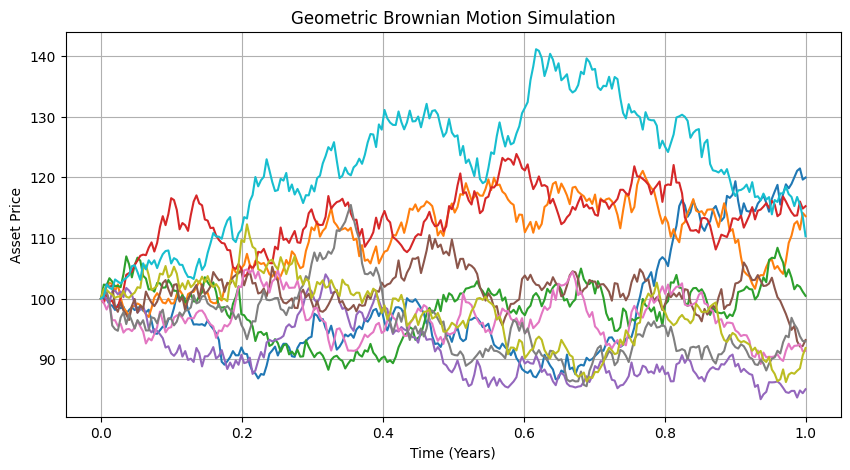

In [5]:
# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, S)
plt.xlabel('Time (Years)')
plt.ylabel('Asset Price')
plt.title('Geometric Brownian Motion Simulation')
plt.grid()
plt.show()